예제 8.5 스타일 전이(TensorflowHub)

In [ ]:
# 예제 8.5 스타일 전이

# 셋업
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 콘텐츠 이미지(사진)/스타일 이미지(칸딘스키 구성8) 준비
content_path = '/content/drive/MyDrive/Datasets/충북대학교.jpg'
content_image = Image.open(content_path)

style_path = tf.keras.utils.get_file(   # Wikimedia Commons에서 다운로드
    'Composition8.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/'
    '0/02/Kandinsky_-_Composition_8%2C_1923.jpg')
style_image = Image.open(style_path)

218875/218875 [==============================] - 0s 0us/step


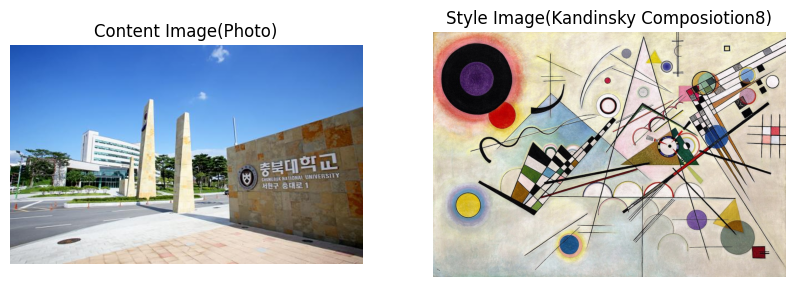

In [ ]:
# 콘텐츠 이미지/스타일 이미지 시각화
plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(content_image)
plt.title('Content Image(Photo)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(style_image)
plt.title('Style Image(Kandinsky Composiotion8)')
plt.axis('off')

plt.show()

In [ ]:
# 스타일 이미지 크기 조정
width, height = content_image.size
style_image = tf.image.resize(style_image, (height, width))

# 이미지 배열로 변환하고 정규화
content_image = np.array(content_image, dtype=np.float32) / 255.
style_image = np.array(style_image, dtype=np.float32) / 255.

# 배치 차원 추가
content_image = np.expand_dims(content_image, axis=0)
style_image = np.expand_dims(style_image, axis=0)

print(f"shape of content image: {content_image.shape}")
print(f"shape of style image: {style_image.shape}")

shape of content image: (1, 398, 640, 3)
shape of style image: (1, 398, 640, 3)


In [ ]:
# 스타일 전이 모델 다운로드
url = 'https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2'

model = hub.load(url)

In [ ]:
# 스타일 전이 이미지 생성
outputs = model(tf.constant(content_image), tf.constant(style_image))
stylized_image = outputs[0]         # 출력 리스트에서 첫 번째 텐서 선택
stylized_image = tf.squeeze(stylized_image, axis=0)   # 배치 차원 축소

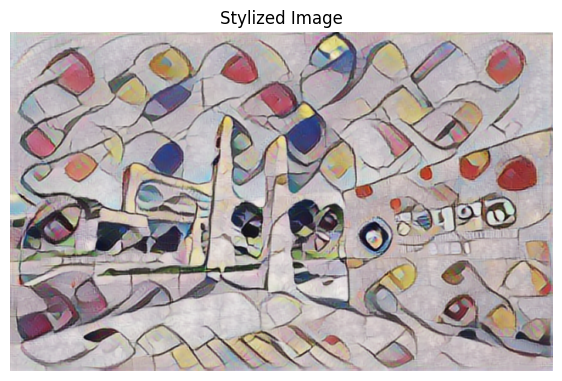

In [ ]:
# 스타일 전이 이미지 시각화
plt.figure(figsize=(7, 7))

plt.imshow(stylized_image)
plt.title('Stylized Image')
plt.axis('off')

plt.show()

In [ ]:
# 스타일 전이된 이미지 저장
stylized_image = stylized_image * 255      # 픽셀 값 스케일 조정(0 ~ 255)
stylized_image = np.array(stylized_image, dtype=np.uint8)   # 배열로 변환
stylized_image = Image.fromarray(stylized_image)      # PIL 이미지로 변환

file_path = '/content/drive/MyDrive/Colab Notebooks/stylized_image2.png'
stylized_image.save(file_path)

In [ ]:
# 저장된 이미지 불러오기
file_path = '/content/drive/MyDrive/Colab Notebooks/stylized_image2.png'
stylized_image = Image.open(file_path)